In [145]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [146]:
dengue_train = pd.read_csv("dengue_features_train.csv")
dengue_labels = pd.read_csv("dengue_labels_train.csv")

In [147]:
dengue_train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.12,0.10,0.20,0.18,12.42,297.57,...,32.00,73.37,12.42,14.01,2.63,25.44,6.90,29.40,20.00,16.00
1,sj,1990,19,1990-05-07,0.17,0.14,0.16,0.16,22.82,298.21,...,17.94,77.37,22.82,15.37,2.37,26.71,6.37,31.70,22.20,8.60
2,sj,1990,20,1990-05-14,0.03,0.17,0.16,0.17,34.54,298.78,...,26.10,82.05,34.54,16.85,2.30,26.71,6.49,32.20,22.80,41.40
3,sj,1990,21,1990-05-21,0.13,0.25,0.23,0.24,15.36,298.99,...,13.90,80.34,15.36,16.67,2.43,27.47,6.77,33.30,23.30,4.00
4,sj,1990,22,1990-05-28,0.20,0.26,0.25,0.25,7.52,299.52,...,12.20,80.46,7.52,17.21,3.01,28.94,9.37,35.00,23.90,5.80


In [148]:
dengue_labels.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [149]:
dengue_labels["city_date"] = dengue_labels["city"].map(str) + dengue_labels["year"].map(str) + dengue_labels["weekofyear"].map(str)
dengue_train["city_date"] = dengue_train["city"].map(str) + dengue_train["year"].map(str) + dengue_train["weekofyear"].map(str)

In [138]:
dengue_labels.head()

,city,year,weekofyear,total_cases,city_date
0,sj,1990,18,4,sj199018
1,sj,1990,19,5,sj199019
2,sj,1990,20,4,sj199020
3,sj,1990,21,3,sj199021
4,sj,1990,22,6,sj199022


In [139]:
dengue_train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,city_date
0,sj,1990,18,1990-04-30,0.12,0.10,0.20,0.18,12.42,297.57,...,73.37,12.42,14.01,2.63,25.44,6.90,29.40,20.00,16.00,sj199018
1,sj,1990,19,1990-05-07,0.17,0.14,0.16,0.16,22.82,298.21,...,77.37,22.82,15.37,2.37,26.71,6.37,31.70,22.20,8.60,sj199019
2,sj,1990,20,1990-05-14,0.03,0.17,0.16,0.17,34.54,298.78,...,82.05,34.54,16.85,2.30,26.71,6.49,32.20,22.80,41.40,sj199020
3,sj,1990,21,1990-05-21,0.13,0.25,0.23,0.24,15.36,298.99,...,80.34,15.36,16.67,2.43,27.47,6.77,33.30,23.30,4.00,sj199021
4,sj,1990,22,1990-05-28,0.20,0.26,0.25,0.25,7.52,299.52,...,80.46,7.52,17.21,3.01,28.94,9.37,35.00,23.90,5.80,sj199022


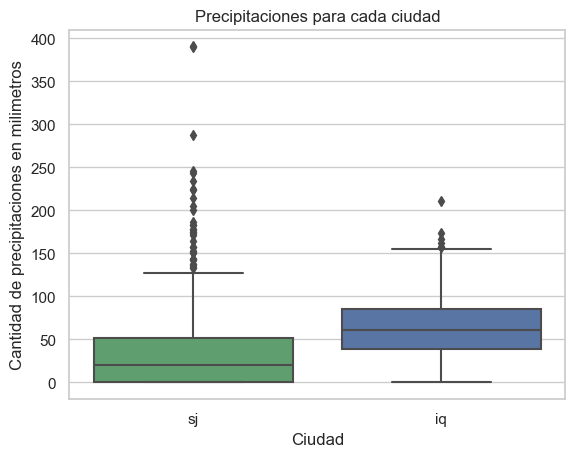

In [150]:
#Box plot
my_pal = {"sj": "g", "iq": "b"}
ax = sns.boxplot(x = "city",
                 y = "precipitation_amt_mm",
                 data = dengue_train,
                 palette=my_pal
                 )\
                .set(title='Precipitaciones para cada ciudad',
                    ylabel='Cantidad de precipitaciones en milimetros',
                    xlabel='Ciudad')